In [39]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/CIRCLES_RIGHT/paojcdvhqn.csv', sep=';')
df

df2 = pd.read_csv('data/TRIANGLE/fqqtyuyzrq.csv', sep=';')
df2

,gyro_x,gyro_y,gyro_z,magnetometer_x,magnetometer_y,magnetometer_z,accelerometer_x,accelerometer_y,accelerometer_z,Unnamed: 9
0,0.071929,-0.276569,0.188834,-6.180000,-10.500000,-34.620000,3.387795,2.224213,8.643368,NaN
1,-0.049633,-0.144622,0.216934,-6.120000,-11.520000,-35.280000,3.756502,2.262521,9.399935,NaN
2,0.032834,0.010537,0.143630,-7.680000,-12.960000,-34.500000,3.354277,2.262521,9.196428,NaN
3,0.012675,-0.586278,0.282907,-7.200000,-11.580000,-36.000000,0.306458,1.532289,10.343250,NaN
4,0.433562,-1.255175,0.606666,-8.760000,-11.759999,-34.860000,-0.869095,0.514753,13.757382,NaN
5,1.272890,-1.020603,1.132010,-11.759999,-13.080000,-33.780000,-0.794875,-1.288081,13.683162,NaN
6,1.652849,0.622013,2.152766,-15.540000,-16.380000,-32.880000,0.579397,-3.318364,15.345037,NaN
7,3.116482,1.898722,2.632295,-16.680000,-18.359999,-32.100000,4.850653,-2.693477,13.879486,NaN
8,2.719419,2.461940,2.217517,-17.220000,-20.279999,-30.660000,5.784690,-2.530671,12.653655,NaN
9,1.322981,2.555402,2.184531,-16.080000,-24.960000,-29.519999,4.479551,-3.256114,10.175656,NaN


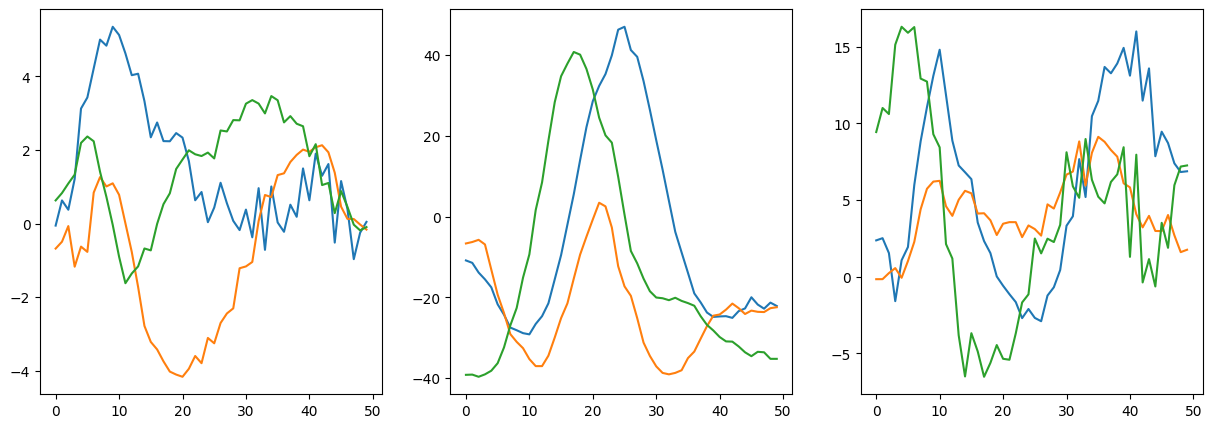

In [40]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)

ax[0].plot(df.iloc[:, 0:3])
ax[1].plot(df.iloc[:, 3:6])
ax[2].plot(df.iloc[:, 6:9])
plt.show()

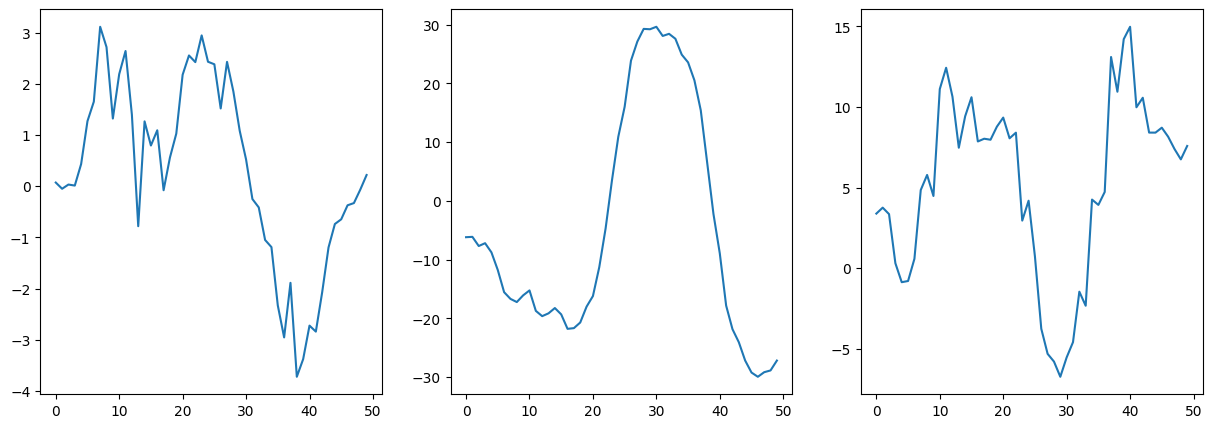

In [43]:
fig, ax = plt.subplots(1,3)
fig.set_size_inches(15, 5)

ax[0].plot(df2.iloc[:, 0:0])
ax[1].plot(df2.iloc[:, 3:3])
ax[2].plot(df2.iloc[:, 6:6])
plt.show()